# Analyse des dommages et des tirs en Isère
Auteur : Daniel Thonon

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import numpy as np
import datetime
# Apply the default theme
sns.set_theme()

In [4]:
data_url = "https://raw.githubusercontent.com/dthonon/pna_loup_suivi/main/data/"
# data_url = "../data/"
# Lecture des départements
constats = pd.read_csv(
    data_url + "bilan_constat_loup_38.csv",
    sep=";",
    header=0,
    names=[
        "Commune",
        "Cercle",
        "Secteur",
        "Lieu-dit",
        "Date attaque",
        "Num semaine",
        "Animaux concernés",
        "Victimes constatées",
        "Taille troupeau ou lot",
        "Conclusion expertise",
        "Indemnisation",
        "Protocole",
        "Num AP tir",
    ],
    usecols=[
        "Commune",
        "Cercle",
        "Secteur",
        "Lieu-dit",
        "Date attaque",
        "Animaux concernés",
        "Victimes constatées",
        "Taille troupeau ou lot",
        "Conclusion expertise",
        "Indemnisation",
    ],
    parse_dates=["Date attaque"],
    dayfirst=True
)
constats["Année"] = pd.to_datetime(constats["Date attaque"]).dt.year
constats


,Commune,Cercle,Secteur,Lieu-dit,Date attaque,Animaux concernés,Victimes constatées,Taille troupeau ou lot,Conclusion expertise,Indemnisation,Année
0,VATILIEU,2,Bas Grésivaudan,Charbonnière,2017-04-14,Ovin,8.0,40.0,Loup,Oui,2017.0
1,VATILIEU,2,Bas Grésivaudan,Charbonnière,2017-04-16,Ovin,7.0,40.0,Loup,Oui,2017.0
2,VATILIEU,2,Bas Grésivaudan,Charbonnière,2017-04-17,Ovin,2.0,40.0,Loup,Oui,2017.0
3,VATILIEU,2,Bas Grésivaudan,Charbonnière,2017-05-04,Ovin,3.0,40.0,Loup,Oui,2017.0
4,VATILIEU,1,Bas Grésivaudan,Charbonnière,2017-05-17,Ovin,1.0,5.0,Loup,Oui,2017.0
...,...,...,...,...,...,...,...,...,...,...,...
2279,GRESSE-EN-VERCORS,1,Vercors Hauts Plateaux,La Chau,2023-07-21,Ovin,33.0,1285.0,Loup typé,Oui,2023.0
2280,IZERON,1,Vercors Nord,Charvolet,2023-02-20,Autre,3.0,11.0,Loup non exclu,Non indemnisable,2023.0
2281,IZERON,1,Vercors Nord,Hameau de San,2023-04-05,Ovin,3.0,NaN,Indéterminé,Non indemnisable,2023.0
2282,SAINT-QUENTIN-SUR-ISÈRE,1,Vercors Nord,Matinerie,2023-06-30,Ovin,8.0,46.0,Loup typé,Oui,2023.0


In [5]:
sorted(constats.Secteur.unique())

['Balmes Viennoises',
 'Bas Drac',
 'Bas Grésivaudan',
 'Beaumont',
 'Belledonne Centre',
 'Belledonne Nord',
 'Belledonne Sud',
 'Bièvre',
 'Chambarans',
 'Chartreuse',
 "Cluses de l'Isère",
 'Collines Viennoises',
 'Connex',
 'Emparis',
 'Grand Armet',
 'Grandes Rousses',
 'Gresse',
 'Haut Grésivaudan',
 "Obiou - Plateau d'Ambel",
 "Plaine de Bourg d'Oisans",
 'Plateau Matheysin',
 'Plateau de Bonnevaux',
 "Plateau de l'Île Crémieu",
 'Royans',
 'Senepy',
 'Tabor',
 'Taillefer',
 'Terres Froides',
 'Terres Froides Méridionales',
 'Terres Froides Occidentales',
 'Terres Froides Septentrionales',
 'Trièves Centre Nord',
 'Trièves Ouest',
 'Trièves Sud',
 'Trièves Sud Ouest',
 'Valbonnais',
 'Valdaine',
 'Valjouffrey',
 'Vallée du Liers et Plateau du Blanchet',
 'Vallée du Rhône entre Vienne et Tournon',
 'Vercors 4 Montagnes',
 'Vercors Balcons Est',
 'Vercors Hauts Plateaux',
 'Vercors Nord',
 'Voironnais',
 'Vénéon']

## Evolution des statuts d'indemnisation

In [6]:
pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Indemnisation",
    columns="Année",
    aggfunc=np.sum,
    fill_value=0,
    margins=True,
    margins_name="Total",
)


/tmp/ipykernel_2050/4146483315.py:1: FutureWarning: The provided callable <function sum at 0x7f58b685b1c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(
/tmp/ipykernel_2050/4146483315.py:1: FutureWarning: The provided callable <function sum at 0x7f58b685b1c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(
/tmp/ipykernel_2050/4146483315.py:1: FutureWarning: The provided callable <function sum at 0x7f58b685b1c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(


Année,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,Total
Indemnisation,,,,,,,,
Attente transmission constat,0.0,0.0,0.0,0.0,3.0,4.0,9.0,16.0
En cours d'instruction,53.0,0.0,72.0,1.0,0.0,0.0,3.0,129.0
Loup typé,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Non - loup exclu,17.0,23.0,34.0,16.0,18.0,12.0,25.0,145.0
Non indemnisable,6.0,31.0,7.0,56.0,49.0,85.0,57.0,291.0
Oui,639.0,700.0,1055.0,1190.0,963.0,1005.0,663.0,6215.0
Total,715.0,754.0,1168.0,1263.0,1033.0,1106.0,758.0,6797.0


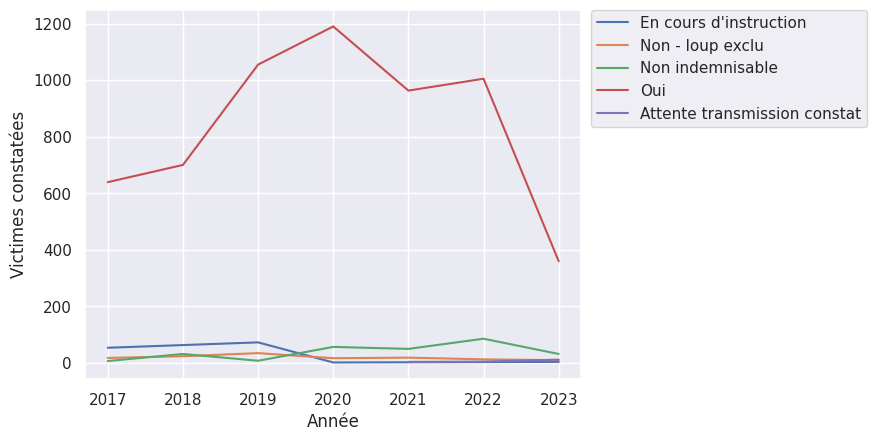

In [38]:
par_indemnisation_l = constats.groupby(["Année", "Indemnisation"]).sum(numeric_only=True)
sns.lineplot(data=par_indemnisation_l, x="Année", y="Victimes constatées", hue="Indemnisation");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

Année,2023
Indemnisation,
Attente transmission constat,11
En cours d'instruction,3
Non - loup exclu,9
Non indemnisable,31
Oui,359


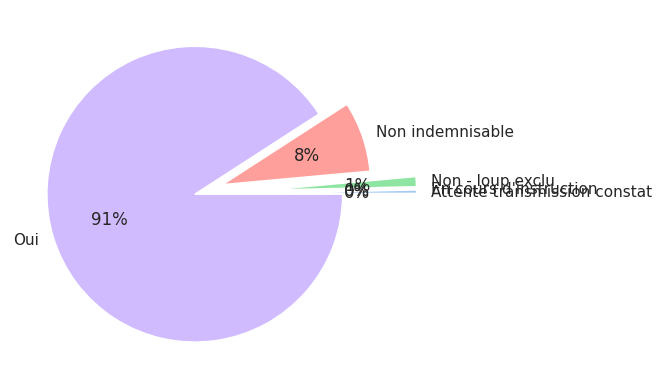

In [39]:
par_indemnisation = pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Indemnisation",
    columns="Année",
    aggfunc=np.sum,
    fill_value=0,
)
data = list(par_indemnisation[[2022]].values.flat)
labels = par_indemnisation[[2022]].index.values
colors = sns.color_palette("pastel")[0:7]
explode = (0.5, 0.5, 0.5, 0.2, 0)
plt.pie(data, labels=labels, colors=colors, explode=explode, autopct="%1.0f%%", labeldistance=1.1)
par_indemnisation[[2023]]


In [40]:
constats_o = constats.query("Indemnisation == 'Oui'")

## Evolution par type d'animal de rente prédaté

In [56]:
par_animal = pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Animaux concernés",
    columns="Année",
    aggfunc=np.sum,
    fill_value=0,
    # margins=True,
    # margins_name="Total"
)
par_animal

Année,2017,2018,2019,2020,2021,2022,2023
Animaux concernés,,,,,,,
Anon naissant,1,0,0,0,0,0,0
Autre,0,0,0,3,0,2,1
Bovin,4,17,17,28,13,26,27
Canin,0,1,0,4,2,3,4
Caprin,4,4,14,33,46,40,10
Equin,0,2,3,0,1,2,1
Ovin,622,667,1001,1107,854,888,299
Veau,4,0,11,8,33,29,10
Veau naissant,4,9,9,7,14,15,7


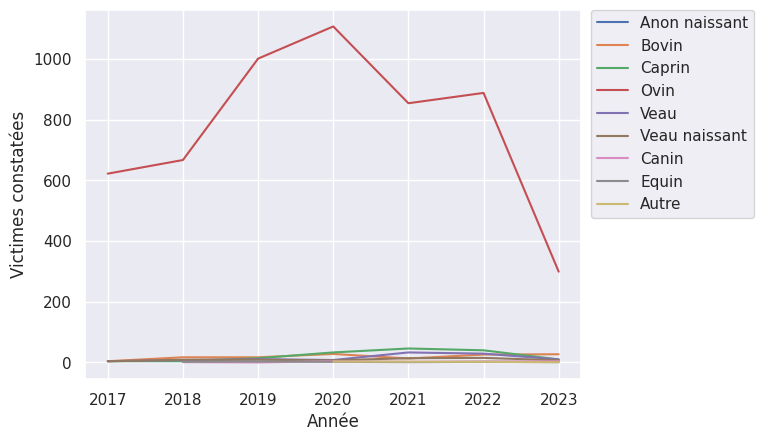

In [57]:
par_animal_l = constats_o.groupby(["Année", "Animaux concernés"]).sum(numeric_only=True)
sns.lineplot(data=par_animal_l, x="Année", y="Victimes constatées", hue="Animaux concernés");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);


## Evolution par secteur

Le tableau suivant résume les dommages indemnisés par secteur.

In [46]:
par_secteur = pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Secteur",
    columns="Année",
    aggfunc=np.sum,
    fill_value=0,
    margins=True,
    margins_name="Total"
)
par_secteur

Année,2017,2018,2019,2020,2021,2022,2023,Total
Secteur,,,,,,,,
Balmes Viennoises,0,0,0,0,0,0,2,2
Bas Drac,9,0,0,9,0,2,1,21
Bas Grésivaudan,21,1,5,43,3,17,1,91
Beaumont,5,16,18,35,3,29,15,121
Belledonne Centre,53,22,38,51,46,45,0,255
Belledonne Nord,20,41,18,20,15,23,20,157
Belledonne Sud,32,17,25,18,39,99,26,256
Bièvre,1,0,1,4,8,9,5,28
Chambarans,0,5,0,0,4,57,13,79


In [43]:
par_secteur = pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Secteur",
    columns="Année",
    aggfunc=np.sum,
    fill_value=0,
    margins=True,
    margins_name="Total"
)
par_secteur

Année,2017,2018,2019,2020,2021,2022,2023,Total
Secteur,,,,,,,,
Balmes Viennoises,0,0,0,0,0,0,2,2
Bas Drac,9,0,0,5,0,1,1,16
Bas Grésivaudan,21,1,5,37,2,3,0,69
Beaumont,0,14,18,35,3,27,14,111
Belledonne Centre,49,18,34,43,45,42,0,231
Belledonne Nord,18,41,18,15,14,23,19,148
Belledonne Sud,28,15,22,18,36,86,18,223
Bièvre,0,0,0,1,8,9,4,22
Chambarans,0,2,0,0,3,49,13,67


In [45]:
par_secteur = pd.pivot_table(
    constats,
    values="Victimes constatées",
    index="Secteur",
    columns="Année",
    aggfunc="count",
    fill_value=0,
    margins=True,
    margins_name="Total"
)
par_secteur

Année,2017,2018,2019,2020,2021,2022,2023,Total
Secteur,,,,,,,,
Balmes Viennoises,0,0,0,0,0,0,2,2
Bas Drac,1,0,0,6,0,2,1,10
Bas Grésivaudan,5,1,3,9,3,5,1,27
Beaumont,3,8,11,8,2,11,10,53
Belledonne Centre,19,16,21,25,26,20,0,127
Belledonne Nord,5,10,9,10,11,9,9,63
Belledonne Sud,11,15,13,14,23,39,15,130
Bièvre,1,0,1,4,7,5,5,23
Chambarans,0,4,0,0,4,28,8,44


In [44]:
par_secteur = pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Secteur",
    columns="Année",
    aggfunc="count",
    fill_value=0,
    margins=True,
    margins_name="Total"
)
par_secteur

Année,2017,2018,2019,2020,2021,2022,2023,Total
Secteur,,,,,,,,
Balmes Viennoises,0,0,0,0,0,0,2,2
Bas Drac,1,0,0,3,0,1,1,6
Bas Grésivaudan,5,1,3,6,2,1,0,18
Beaumont,0,6,11,8,2,9,9,45
Belledonne Centre,18,11,18,20,25,18,0,110
Belledonne Nord,3,10,9,7,10,9,8,56
Belledonne Sud,7,13,10,14,20,32,10,106
Bièvre,0,0,0,1,7,5,4,17
Chambarans,0,1,0,0,3,22,8,34


## Evolution par commune

In [58]:
par_commune = pd.pivot_table(
    constats_o,
    values="Victimes constatées",
    index="Commune",
    columns="Année",
    aggfunc=np.sum,
    fill_value=0,
    margins=True,
    margins_name="Total"
)
pd.set_option('display.max_rows', 500)
par_commune

Année,2017,2018,2019,2020,2021,2022,2023,Total
Commune,,,,,,,,
ALLEMOND,20,2,1,12,5,4,0,44
ALLEVARD,17,21,6,1,1,0,0,46
AURIS,9,0,3,49,4,5,0,70
AUTRANS-MÉAUDRE EN VERCORS,2,0,0,0,3,0,0,5
AVIGNONET,6,0,0,0,0,0,0,6
BESSE,26,2,22,13,31,19,9,122
BESSINS,0,0,0,0,0,4,0,4
BIOL,0,0,0,0,3,0,0,3
BOSSIEU,0,0,0,0,8,10,1,19


## Pression de prédation

In [59]:
gis_dir = "/home/daniel/Data/SIG/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2021-11-16/ADE_3-1_SHP_LAMB93_FR/"
# departements = gpd.read_file(gis_dir + "DEPARTEMENT.shp")
communes = gpd.read_file(gis_dir + "COMMUNE.shp")

In [60]:
communes_38 = communes.query("INSEE_DEP == '38'")[["NOM", "geometry"]]
communes_38["Commune"] = communes_38["NOM"].str.upper()
communes_38 = communes_38.drop(columns="NOM").set_index("Commune")

In [64]:
par_commune_l = constats_o.groupby(["Année", "Commune"]).sum(numeric_only=True)

par_commune_l_2017 = par_commune_l.query("Année == 2017").reset_index(inplace=False).set_index("Commune").drop(columns="Année")
par_commune_l_2017 = communes_38.merge(
    par_commune_l_2017, left_index=True, right_index=True, how="outer"
)
par_commune_l_2018 = par_commune_l.query("Année == 2018").reset_index(inplace=False).set_index("Commune").drop(columns="Année")
par_commune_l_2018 = communes_38.merge(
    par_commune_l_2018, left_index=True, right_index=True, how="outer"
)
par_commune_l_2019 = par_commune_l.query("Année == 2019").reset_index(inplace=False).set_index("Commune").drop(columns="Année")
par_commune_l_2019 = communes_38.merge(
    par_commune_l_2019, left_index=True, right_index=True, how="outer"
)
par_commune_l_2020 = par_commune_l.query("Année == 2020").reset_index(inplace=False).set_index("Commune").drop(columns="Année")
par_commune_l_2020 = communes_38.merge(
    par_commune_l_2020, left_index=True, right_index=True, how="outer"
)
par_commune_l_2021 = par_commune_l.query("Année == 2021").reset_index(inplace=False).set_index("Commune").drop(columns="Année")
par_commune_l_2021 = communes_38.merge(
    par_commune_l_2021, left_index=True, right_index=True, how="outer"
)
par_commune_l_2022 = par_commune_l.query("Année == 2022").reset_index(inplace=False).set_index("Commune").drop(columns="Année")
par_commune_l_2022 = communes_38.merge(
    par_commune_l_2022, left_index=True, right_index=True, how="outer"
)
par_commune_l_2023 = par_commune_l.query("Année == 2023").reset_index(inplace=False).set_index("Commune").drop(columns="Année")
par_commune_l_2023 = communes_38.merge(
    par_commune_l_2023, left_index=True, right_index=True, how="outer"
)

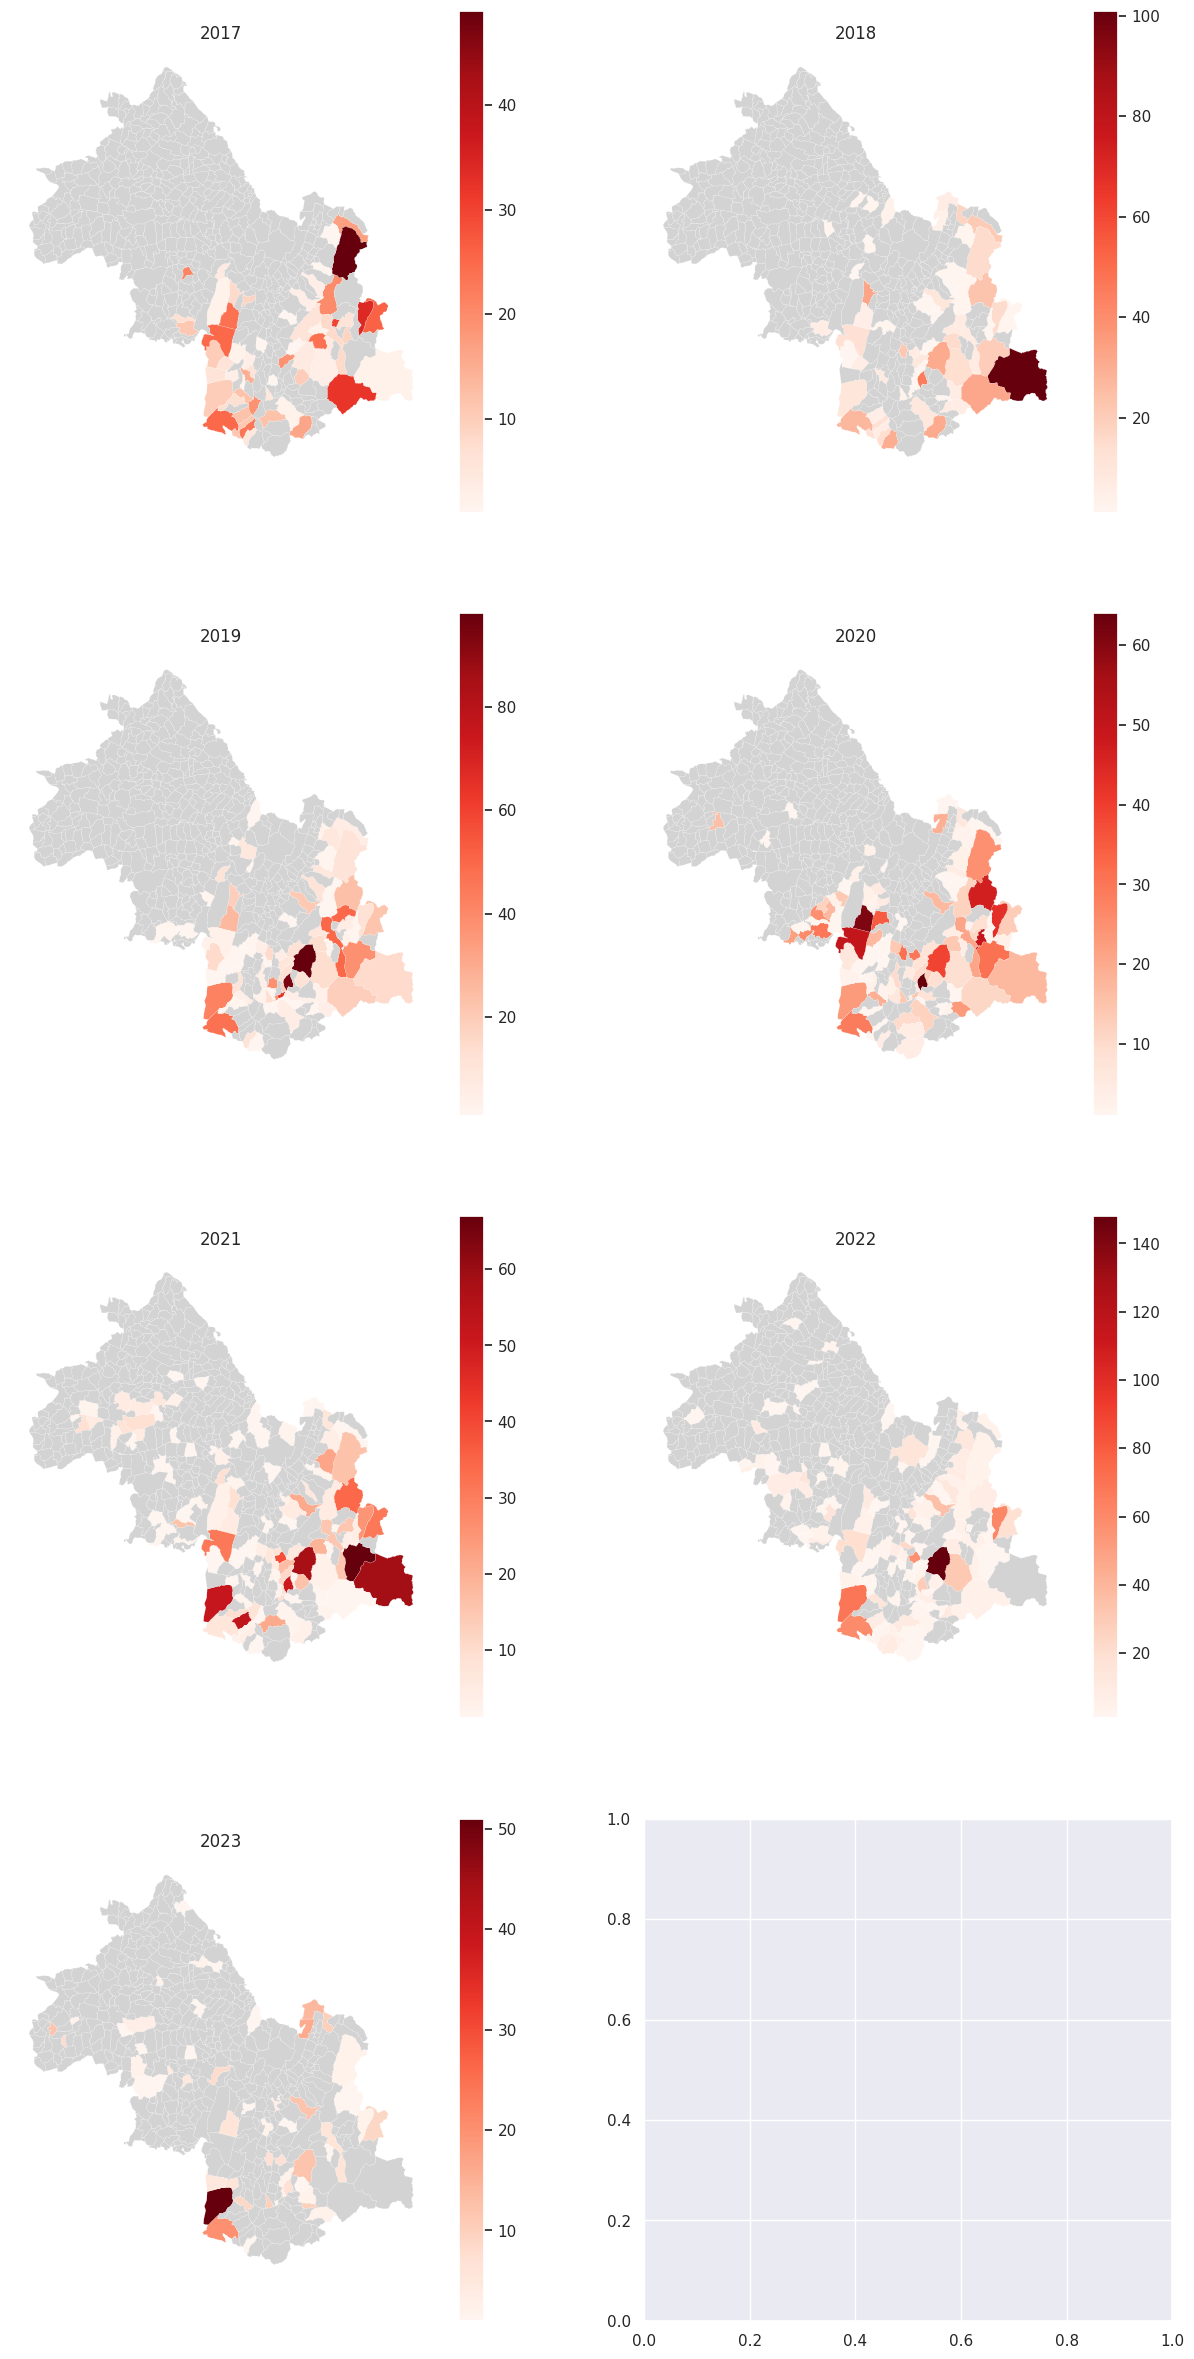

In [65]:
fig, axs = plt.subplots(4, 2, figsize=(15,30 ));
axs[0, 0].set_axis_off()
axs[0, 0].set_title("2017")
par_commune_l_2017.plot(
    ax=axs[0, 0],
    column="Victimes constatées",
    linewidth=0.1,
    legend=True,
    #legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap='Reds',
);
axs[0, 1].set_axis_off()
axs[0, 1].set_title("2018")
par_commune_l_2018.plot(
    ax=axs[0, 1],
    column="Victimes constatées",
    linewidth=0.1,
    legend=True,
    #legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap='Reds',
);
axs[1, 0].set_axis_off()
axs[1, 0].set_title("2019")
par_commune_l_2019.plot(
    ax=axs[1, 0],
    column="Victimes constatées",
    linewidth=0.1,
    legend=True,
    #legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap='Reds',
);
axs[1, 1].set_axis_off()
axs[1, 1].set_title("2020")
par_commune_l_2020.plot(
    ax=axs[1, 1],
    column="Victimes constatées",
    linewidth=0.1,
    legend=True,
    #legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap='Reds',
);
axs[2, 0].set_axis_off()
axs[2, 0].set_title("2021")
par_commune_l_2021.plot(
    ax=axs[2, 0],
    column="Victimes constatées",
    linewidth=0.1,
    legend=True,
    #legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap='Reds',
);
axs[2, 1].set_axis_off()
axs[2, 1].set_title("2022")
par_commune_l_2022.plot(
    ax=axs[2, 1],
    column="Victimes constatées",
    linewidth=0.1,
    legend=True,
    #legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap='Reds',
);
axs[3, 0].set_axis_off()
axs[3, 0].set_title("2023")
par_commune_l_2023.plot(
    ax=axs[3, 0],
    column="Victimes constatées",
    linewidth=0.1,
    legend=True,
    #legend_kwds={"label": "Prédations par commune", "orientation": "horizontal"},
    missing_kwds={"color": "lightgrey"},
    cmap='Reds',
);

## Etude de certains secteurs

### Belledonne Sud

In [66]:
constats_bs = constats_o.query("Secteur == 'Belledonne Sud' & Année > 2015")
# constats_bs.sort_values(by="Date attaque")

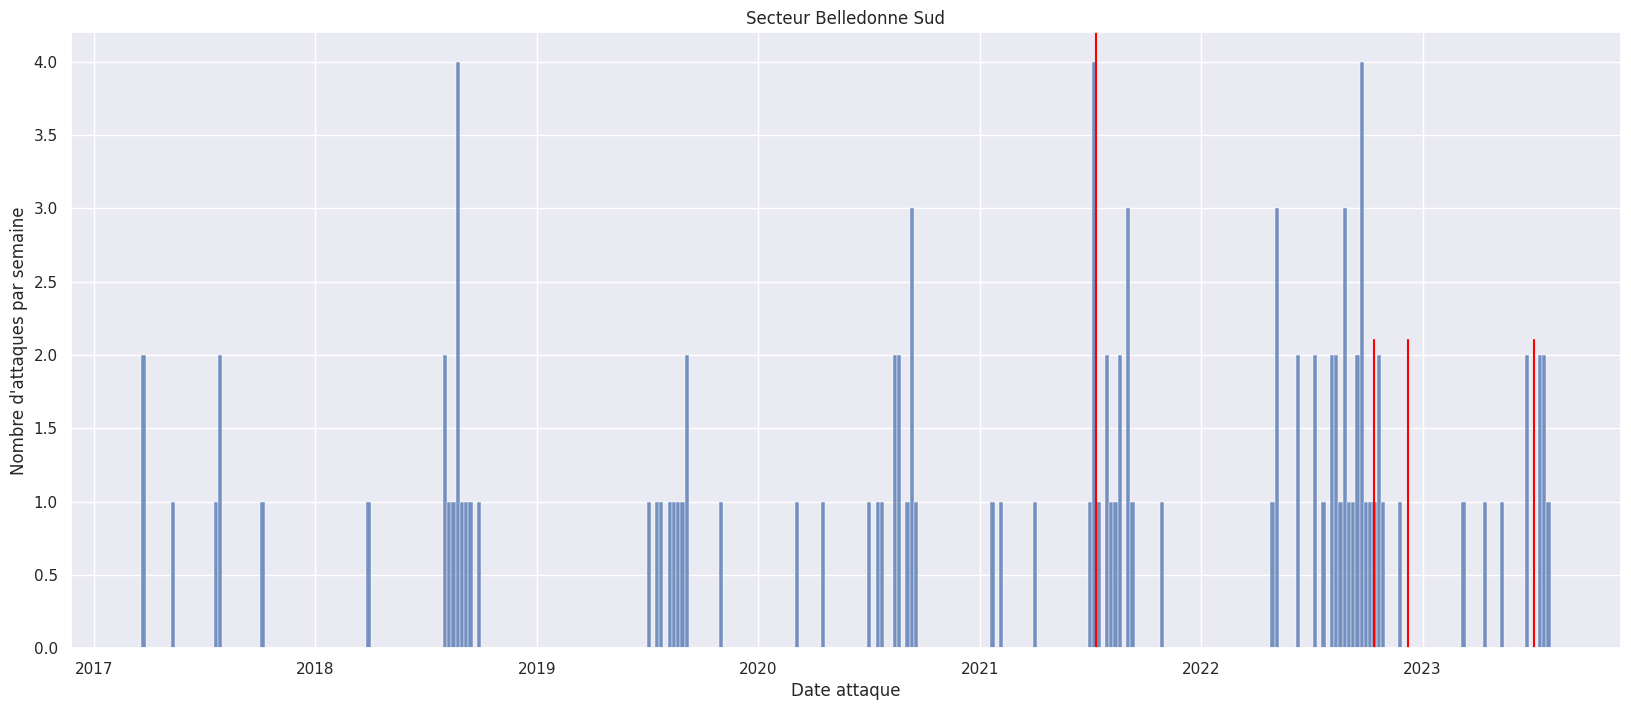

In [68]:
plt.figure(figsize=(20, 8))
# ax = sns.scatterplot(data=constats_bs, x="Date attaque", y="Victimes constatées").set(title="Secteur Belledonne Sud");
ax = sns.histplot(
    data=constats_bs, x="Date attaque", binwidth=7
).set(title="Secteur Belledonne Sud", ylabel="Nombre d'attaques par semaine")
plt.axvline(x=datetime.datetime(2021, 7, 11), color="red")
plt.axvline(x=datetime.datetime(2022, 10, 13), color="red", ymax=0.5)
plt.axvline(x=datetime.datetime(2022, 12, 8), color="red", ymax=0.5)
plt.axvline(x=datetime.datetime(2023, 7, 3), color="red", ymax=0.5)
plt.show()

### Belledonne centre

In [69]:
constats_bc = constats_o.query("Secteur == 'Belledonne Centre' & Année > 2015")

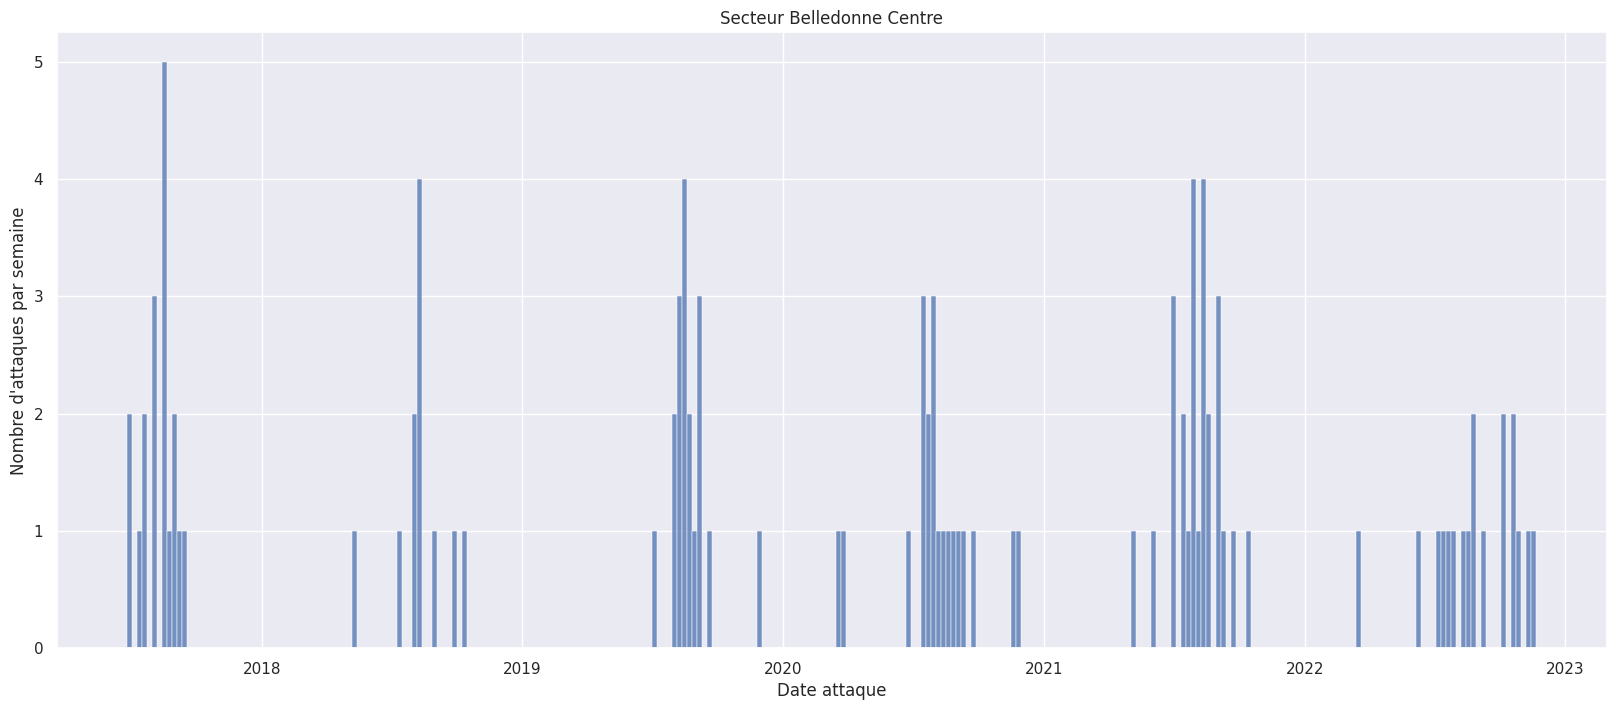

In [70]:
plt.figure(figsize=(20, 8))
# ax = sns.scatterplot(data=constats_bs, x="Date attaque", y="Victimes constatées").set(title="Secteur Belledonne Sud");
ax = sns.histplot(
    data=constats_bc, x="Date attaque", binwidth=7
).set(title="Secteur Belledonne Centre", ylabel="Nombre d'attaques par semaine")
plt.show()

### Belledonne Nord

In [71]:
constats_bn = constats_o.query("Secteur == 'Belledonne Centre' & Année > 2015")

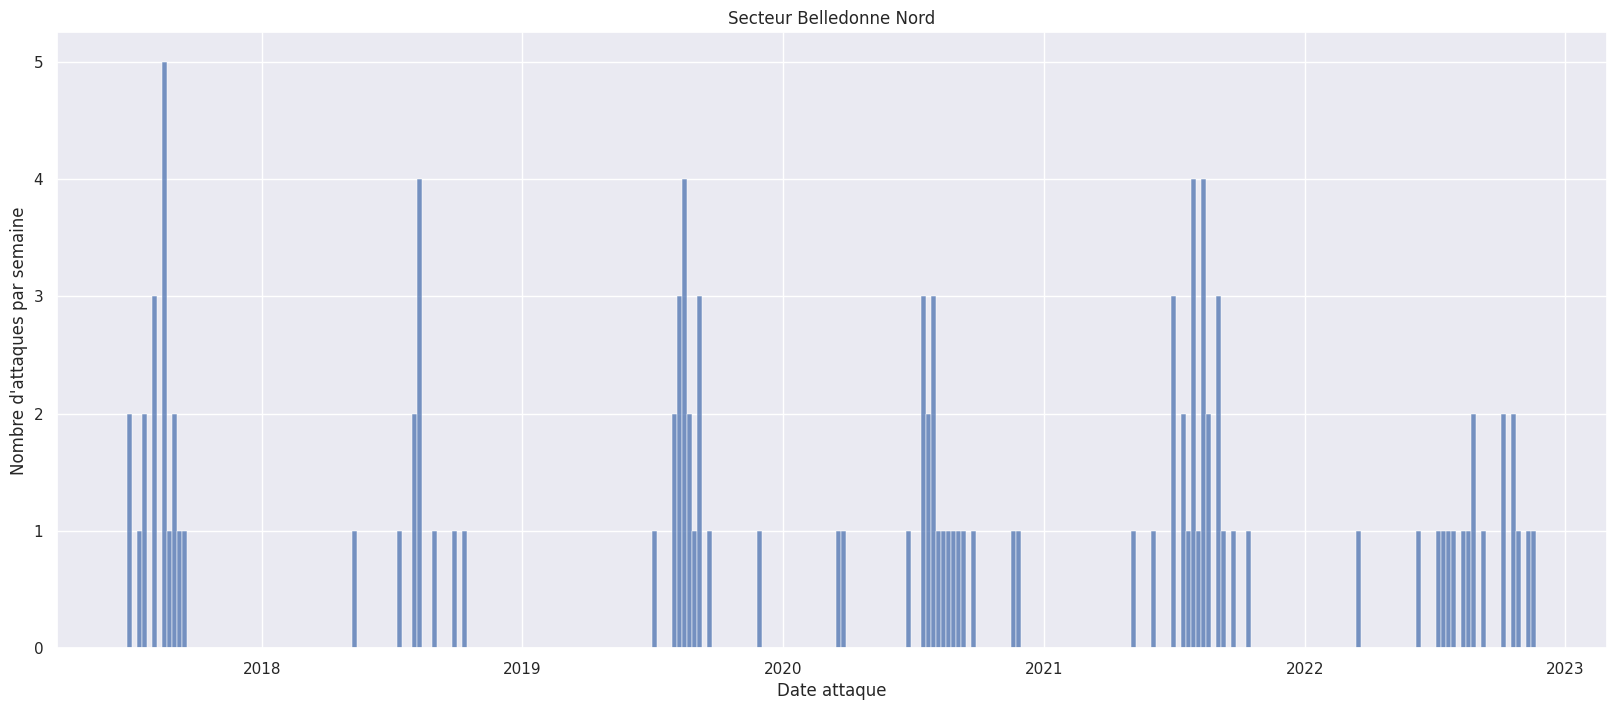

In [72]:
plt.figure(figsize=(20, 8))
ax = sns.histplot(
    data=constats_bn, x="Date attaque", binwidth=7
).set(title="Secteur Belledonne Nord", ylabel="Nombre d'attaques par semaine")
plt.show()

### Beaumont

In [73]:
constats_b = constats_o.query("Secteur == 'Beaumont' & Année > 2015")
# constats_b.sort_values(by="Date attaque")

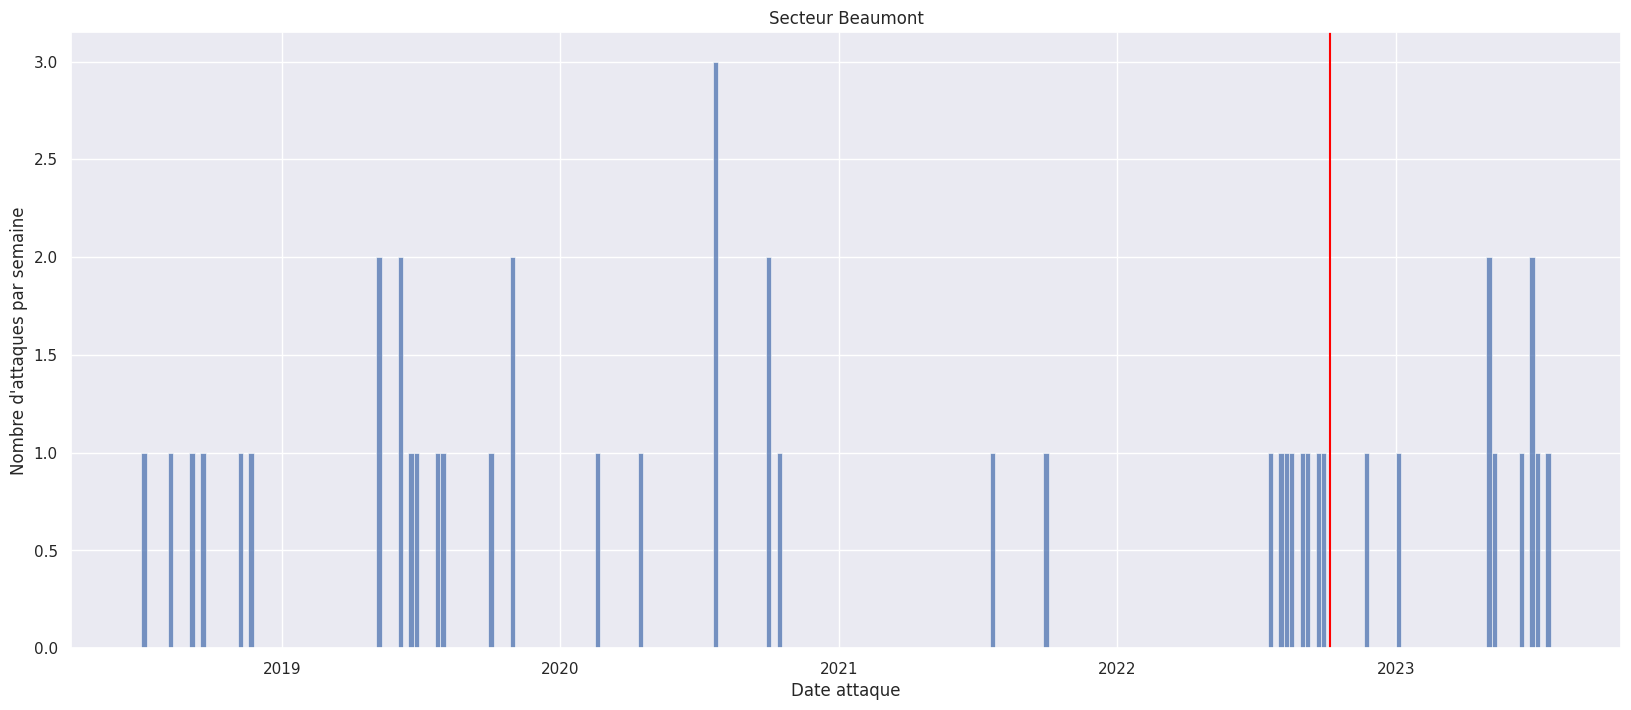

In [74]:
plt.figure(figsize=(20, 8))
ax = sns.histplot(
    data=constats_b, x="Date attaque", binwidth=7
).set(title="Secteur Beaumont", ylabel="Nombre d'attaques par semaine")
plt.axvline(x=datetime.datetime(2022, 10, 7), color="red")
plt.show()